In [18]:
from hgcal_dev.metrics.instance import match_instances
import plotly.express as px
import plotly
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
from hdbscan import HDBSCAN
from sklearn.manifold import TSNE

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
hcal_data_dir = Path('/global/cscratch1/sd/schuya/hgcal-dev/predictions/px5apiy4')

In [5]:
events = [np.load(f) for f in hcal_data_dir.glob('*.npz')]

In [6]:
events[0]

In [8]:
events[0]['labels']

array([34, 34, 34, ..., 34, 34, 37], dtype=int32)

In [24]:
original_tsne = TSNE().fit_transform(events[0]['inputs'])

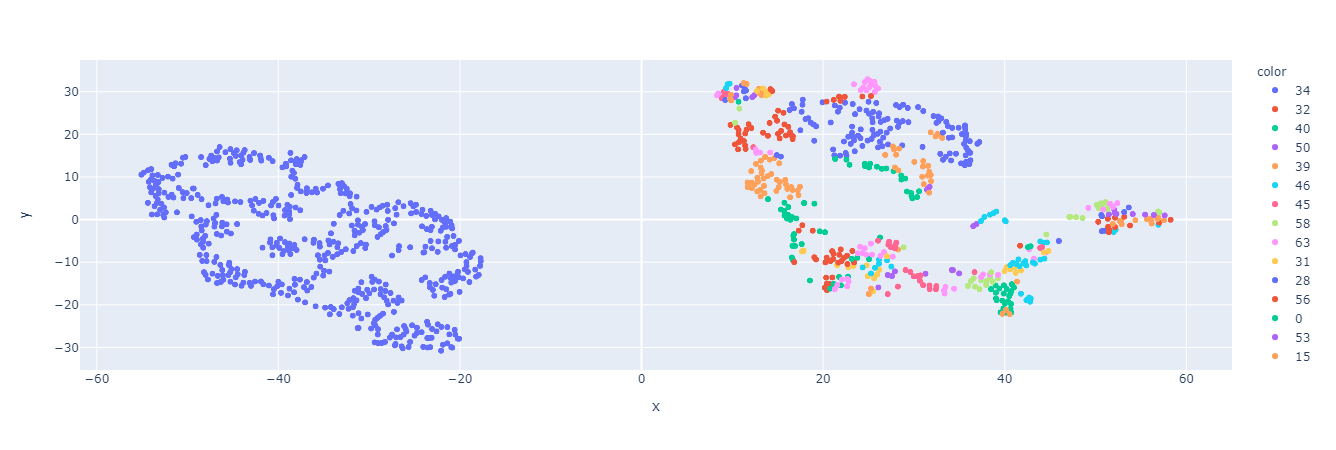

In [25]:
px.scatter(x=original_tsne[:, 0], y=original_tsne[:, 1], color=events[0]['labels'].astype('str'))

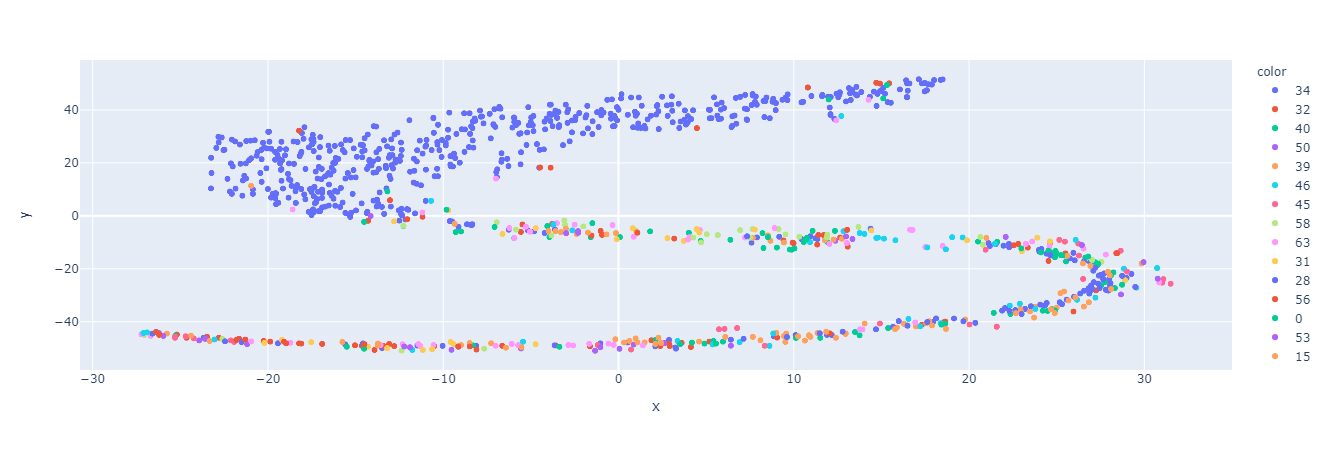

In [38]:
pred_tsne = TSNE().fit_transform(events[0]['prediction'])
px.scatter(x=pred_tsne[:, 0], y=pred_tsne[:, 1], color=events[0]['labels'].astype('str'))

In [40]:
clusterer = HDBSCAN(min_cluster_size=2)

In [41]:
clusterer.fit(events[0]['prediction'])

HDBSCAN(min_cluster_size=2)

In [42]:
pred_labels = clusterer.labels_

In [43]:
truth_to_pred, pred_to_truth, ious = match_instances(events[0]['labels'], pred_labels)

In [44]:
ious.mean()

0.10160459411696017

In [45]:
clusterer_original = HDBSCAN(min_cluster_size=2)
clusterer_original.fit(events[0]['inputs'])
pred_labels = clusterer_original.labels_
truth_to_pred, pred_to_truth, ious = match_instances(events[0]['labels'], pred_labels)
print(ious.mean())

0.0273651382085117
